Udemy is an online learning platform with 35M Learners, 57K Instructors, 130K Courses, 400M Course enrollments, 110M Minutes of video, courses taught in 65+ Languages (https://about.udemy.com/).


It was founded in May 2010 by Eren Bali, Gagan Biyani, and Oktay Caglar and it has consistently catered to the needs of those willing to improve on their existing skill or pick up a new skill.

In this notebook, we take a look at various courses offered by udemy between 2011 and 2017 and make a number of analysis based on the dataset.

Please let me know if this notebook was helpful and do feel free to comment on what aspects can be improved.

Some codes in this notebook were written based on some notebooks earlier submitted

# Its a bunch of open ended questions:


•	What are the best free courses by subject?


•	What are the most popular courses?


•	What are the most engaging courses?


•	How are courses related?


•	Which courses offer the best cost benefit?



### Import necessary libraries

In [71]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

### Read the data 

In [72]:
udemy_courses = pd.read_csv(r'E:\Dataset\udemy_courses.csv')
udemy_courses.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [73]:
udemy_courses.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


From the above, we can deduce that

1) The minimum content duration is 0 hours and number of lectures is 0, which is impossible, so we would have to drop such rows

2) The highest number of subscribers is almost 10x more than the highest number of review

3) The average price for courses is $ 66.05 (approx.), the minimum price is $ 0, indicating that some courses were free and the highest price is $ 200

In [74]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 247.9+ KB


In [75]:
udemy_courses.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

The URL and Column id have little to no impact on our analysis, we can drop them

In [76]:
udemy_courses = udemy_courses.drop(columns = ['course_id', 'url'])
udemy_courses.head(5)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


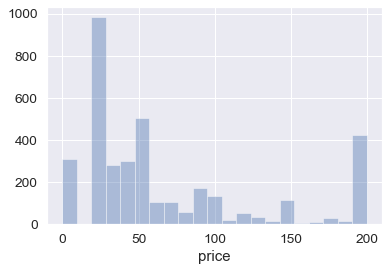

In [121]:
sns.distplot(udemy_courses['price'], kde = False)


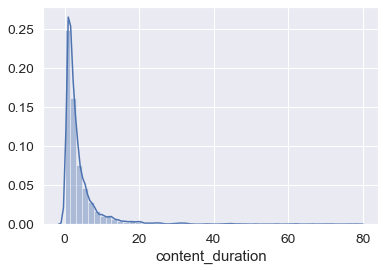

In [78]:
sns.distplot(udemy_courses['content_duration'], kde = True)

From earlier insight into the data, we noticed the duration for some courses was shown as 0. Since this is almost impossible, we would drop all rows with it content duration as 0

In [79]:
print (udemy_courses.loc[udemy_courses['content_duration'] == 0])

                                          course_title  is_paid  price  \
892  Mutual Funds for Investors in Retirement Accounts     True     20   

     num_subscribers  num_reviews  num_lectures       level  content_duration  \
892                0            0             0  All Levels               0.0   

      published_timestamp           subject  
892  2015-12-17T05:38:38Z  Business Finance  


In [80]:
id = udemy_courses[udemy_courses['content_duration'] == 0].index.values[0]
udemy_courses.drop(id,axis=0,inplace=True)

In [81]:
udemy_courses.shape

(3677, 10)

# Question 1: What are the best free courses by subject?

In [82]:
free_courses = udemy_courses[udemy_courses['is_paid'] == 0]
free_courses.shape

(310, 10)

In [83]:
paid_courses = udemy_courses[udemy_courses['is_paid'] == 1]
paid_courses.shape

(3367, 10)

From the above, we observe that there are 310 free courses and 3367 paid courses

In [84]:
subject_unique = udemy_courses['subject'].unique()
subject_unique

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [85]:
for x in subject_unique:
    subscribers = free_courses[free_courses['subject'] == x]['num_subscribers'].max()
    course = free_courses[(free_courses['num_subscribers'] == subscribers)]['course_title'].unique()
    
    print("The best free course offered by udemy for {} is \n{} with {} subscribers\n".format(x,course[0],subscribers))


The best free course offered by udemy for Business Finance is 
Bitcoin or How I Learned to Stop Worrying and Love Crypto with 65576 subscribers

The best free course offered by udemy for Graphic Design is 
Photoshop In-Depth: Master all of Photoshop's Tools Easily with 53851 subscribers

The best free course offered by udemy for Musical Instruments is 
Free Beginner Electric Guitar Lessons with 101154 subscribers

The best free course offered by udemy for Web Development is 
Learn HTML5 Programming From Scratch with 268923 subscribers



In [86]:
for x in subject_unique:
    subscribers = paid_courses[paid_courses['subject'] == x]['num_subscribers'].max()
    course = paid_courses[(paid_courses['num_subscribers'] == subscribers)]['course_title'].unique()
    
    print("The best paid course offered by udemy for {} is \n{} with {} subscribers\n".format(x,course[0],subscribers))


The best paid course offered by udemy for Business Finance is 
The Complete Financial Analyst Course 2017 with 24481 subscribers

The best paid course offered by udemy for Graphic Design is 
Photoshop for Entrepreneurs - Design 11 Practical Projects with 36288 subscribers

The best paid course offered by udemy for Musical Instruments is 
Pianoforall - Incredible New Way To Learn Piano & Keyboard with 75499 subscribers

The best paid course offered by udemy for Web Development is 
The Web Developer Bootcamp with 121584 subscribers



# Question 2: What are the most popular courses

Grouping the most popular courses based on their number of subscribers

In [87]:
udemy_courses[['course_title', 'num_subscribers']].sort_values('num_subscribers', ascending = False).head(5)

,course_title,num_subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512


Of the top 5 courses by its subscribers, four of them are web development courses. 

# Question 3: What are the most engaging courses?
Total engagement = number of subscribers + number of reviews. We need to create new column

In [88]:
udemy_courses['Engagement'] = udemy_courses['num_subscribers'] + udemy_courses['num_reviews']

In [89]:
udemy_courses.head(5)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Engagement
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2170
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,3715
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2248
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2462
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,1321


In [90]:
udemy_courses[['course_title', 'Engagement']].sort_values('Engagement', ascending = False).head(5)

,course_title,Engagement
2827,Learn HTML5 Programming From Scratch,277552
3032,Coding for Entrepreneurs Basic,161308
3230,The Web Developer Bootcamp,149029
3232,The Complete Web Developer Course 2.0,136924
2783,Build Your First Website in 1 Week with HTML5 ...,126215


Just like the total number of subscribers, the list remains unchanged.

# Question 4 : How are the courses related

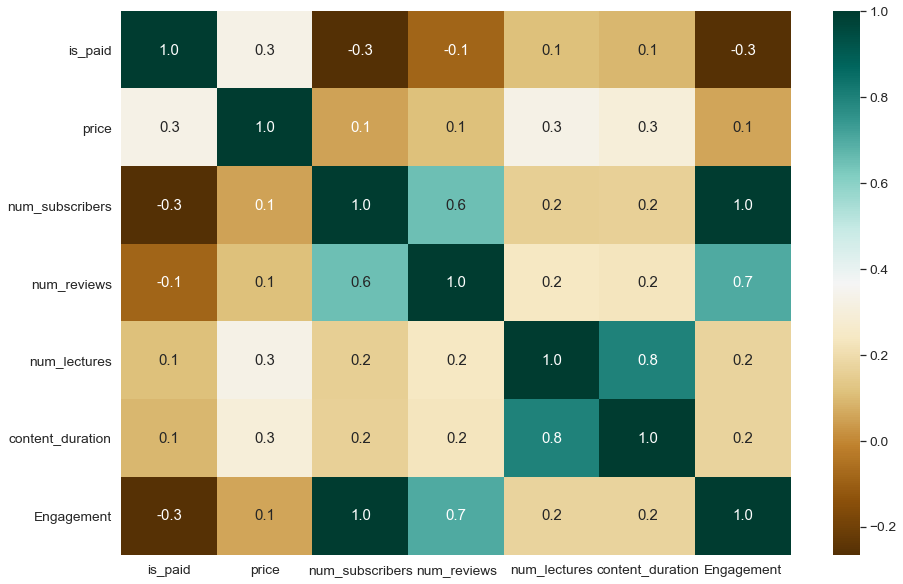

In [91]:
corr = udemy_courses.corr()
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(udemy_courses.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

The correlation map above shows that there is a positive correlation between the number of reviews and the number of subscribers a course has (0.6), and a strong positive correlation (0.8) between the number of lectures and the content duration. These two have the highest correlation.

On the other hand, there is a negative correlation between the number of subscribers and payment for a course (-0.3)

# Question 5: What courses offer the best cost benefit
By saying the best cost benefit, we can determine this by finding the course with the least amount paid, but has the highest number of subscribers. If we had a reviews or star rating column, this might have been more accurate

In [92]:
cost_benefit = udemy_courses[(udemy_courses['price']
                              <=udemy_courses['price'].mean()) 
                             & (udemy_courses['num_subscribers']
                                >=udemy_courses['num_subscribers'].mean())].sort_values(('num_subscribers'),ascending=False)['course_title'].head(1).unique()
print("The course which offers the best cost benefit is : \n", cost_benefit)

The course which offers the best cost benefit is : 
 ['Learn HTML5 Programming From Scratch']


# Further analysis and visualization

Before further analysis, the price will be distributed into bins of Free (0), Low (1-75), Medium (76-150), and High (151-200) and the published_timestamp column is not in datetime format, so it will be converted to datetime format and the year will be extracted

In [93]:
conditions = [
    udemy_courses['price'] == 0,
    ((udemy_courses['price'] > 0) & (udemy_courses['price'] <= 75)),
    ((udemy_courses['price'] > 75) & (udemy_courses['price'] <=150))
]

choices = [
    'Free',
    'Low',
    'Medium'
]

# create a new column or assign it to an existing
# the last param in np.select is default
udemy_courses['price_bin'] = np.select(conditions, choices, 'High')

In [94]:
udemy_courses['published_timestamp'] = pd.to_datetime(udemy_courses['published_timestamp'])
udemy_courses['date_published'] = udemy_courses['published_timestamp'].dt.date
udemy_courses['time_published'] = udemy_courses['published_timestamp'].dt.time
udemy_courses['year']=pd.DatetimeIndex(udemy_courses['published_timestamp']).year

In [95]:
udemy_courses.head(5)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Engagement,price_bin,date_published,time_published,year
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2170,High,2017-01-18,20:58:58,2017
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,3715,Low,2017-03-09,16:34:20,2017
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2248,Low,2016-12-19,19:26:30,2016
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2462,Medium,2017-05-30,20:07:24,2017
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,1321,High,2016-12-13,14:57:18,2016


In [96]:
udemy_courses = udemy_courses.drop('published_timestamp', axis = 1)

# Total number of paid and unpaid courses

In [97]:
udemy_courses["is_paid"].value_counts()

True     3367
False     310
Name: is_paid, dtype: int64

In [98]:
price_list=udemy_courses["is_paid"].unique()
price_count=udemy_courses['is_paid'].value_counts().reset_index()
fig11=px.bar(price_count, x='index', y='is_paid', text='is_paid', color='is_paid',
             title='count of courses paid and unpaid for',
             labels={'index':'paid/unpaid courses','is_paid':'count of paid/unpaid courses'})
fig11.update_layout(showlegend=False, width=600)
fig11.show()

# Count of courses based on its bins

In [99]:
bin_list=udemy_courses["price_bin"].unique()
bin_count=udemy_courses['price_bin'].value_counts().reset_index()
fig2=px.bar(bin_count, x='index', y='price_bin', text='price_bin', color='price_bin',
             title='count of courses according to its price bin',
             labels={'index':'price bins','price_bin':'count of courses based on price'})
fig2.update_layout(showlegend=False, width=800)
fig2.show()

# Breakdown of subjects based on its total number of subscribers

Text(0.5, 1.0, 'Breakdown of subjects based on total number of subscribers')

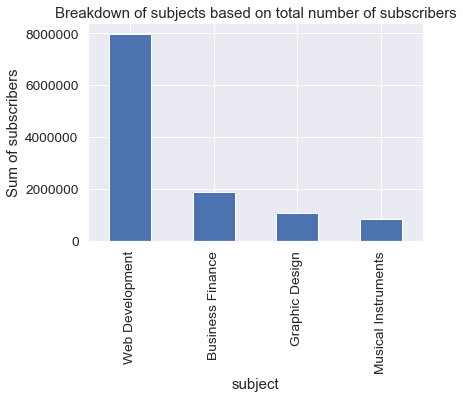

In [100]:
udemy_courses.groupby('subject')['num_subscribers'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Sum of subscribers')
plt.title('Breakdown of subjects based on total number of subscribers')

As expected from earlier analysis, web development courses have the highest number of subscribers with almost 8 million subscribers in total. This could be because as at 2015, web development was number 5 in top 10 IT skills 194 IT executives said would be in demand (Mary K. Pratt, 2014)

In [101]:
udemy_courses.groupby('subject')['num_subscribers'].sum().sort_values(ascending = False)

subject
Web Development        7980572
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Name: num_subscribers, dtype: int64

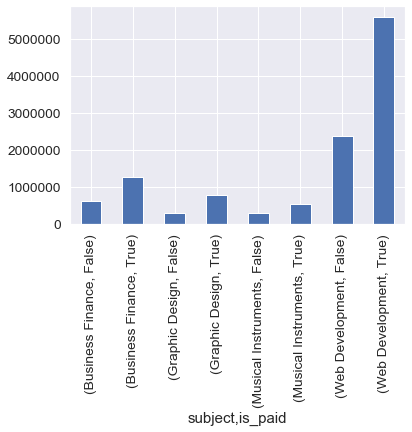

In [102]:
udemy_courses.groupby(['subject', 'is_paid'])['num_subscribers'].sum().plot(kind = 'bar')

Of the 7.9 million subscribers to web development courses, over 2million of them subscribed to a free web development course

In [103]:
udemy_courses.groupby(['subject', 'is_paid'])['num_subscribers'].sum()

subject              is_paid
Business Finance     False       603228
                     True       1265483
Graphic Design       False       284821
                     True        778327
Musical Instruments  False       304735
                     True        541954
Web Development      False      2382741
                     True       5597831
Name: num_subscribers, dtype: int64

# Total Number of courses in each subject

Text(0.5, 1.0, 'Subject count')

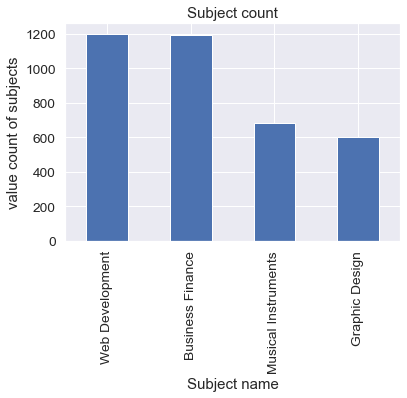

In [104]:
udemy_courses['subject'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('value count of subjects')
plt.xlabel('Subject name')
plt.title('Subject count')


Although web development courses have more than 3x the number of Business Finance subscribers, Business Finance rivaled web development for the number of courses released under it.

In [105]:
udemy_courses['subject'].value_counts().sort_values(ascending = False)

Web Development        1200
Business Finance       1194
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

# Subject breakdown (Paid and Unpaid)

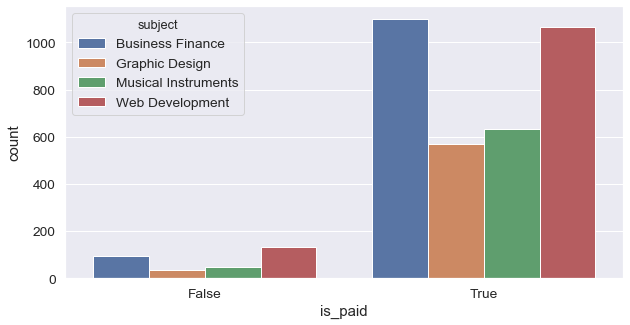

In [106]:
plt.figure(figsize = (10, 5))
sns.countplot('is_paid', hue = 'subject', data = udemy_courses)

Business Finance has the highest number of paid courses while Web Development has the highest number of free courses

In [107]:
udemy_courses.groupby('subject')['is_paid'].value_counts().sort_values(ascending = False)

subject              is_paid
Business Finance     True       1098
Web Development      True       1067
Musical Instruments  True        634
Graphic Design       True        568
Web Development      False       133
Business Finance     False        96
Musical Instruments  False        46
Graphic Design       False        35
Name: is_paid, dtype: int64

# Breakdown of subjects based on wheter they are paid for or not

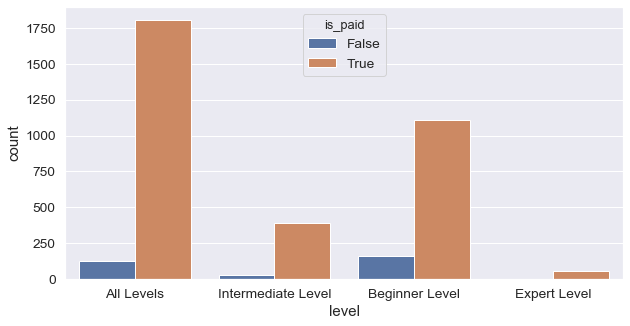

In [108]:
plt.figure(figsize = (10, 5))
sns.countplot('level', hue = 'is_paid', data = udemy_courses)

Seems that truly, a good education is expensive as Expert level courses although not many, has no free course. They have to be paid for.

In [109]:
udemy_courses.groupby('level')['is_paid'].value_counts()

level               is_paid
All Levels          True       1806
                    False       122
Beginner Level      True       1112
                    False       158
Expert Level        True         58
Intermediate Level  True        391
                    False        30
Name: is_paid, dtype: int64

# Breakdown of subject by level

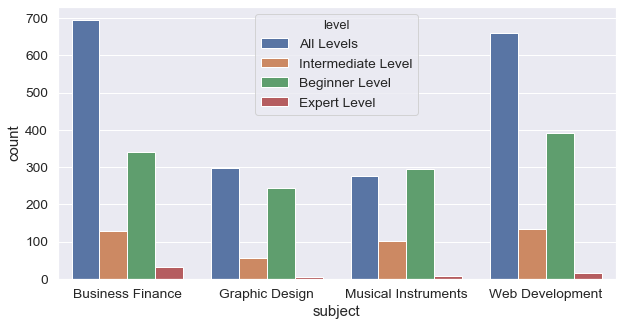

In [110]:
plt.figure(figsize = (10,5))
sns.countplot('subject', hue = 'level', data = udemy_courses)

# Level count

Text(0.5, 1.0, 'Number of courses based on level of expertise')

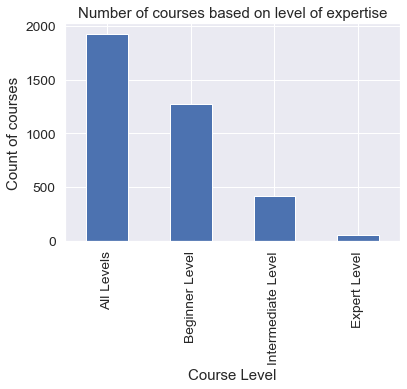

In [111]:
udemy_courses["level"].value_counts().plot(kind="bar")
plt.ylabel('Count of courses')
plt.xlabel('Course Level')
plt.title('Number of courses based on level of expertise')

It seems as the level increases, the less number of courses are put out.

# Content/Course released per year

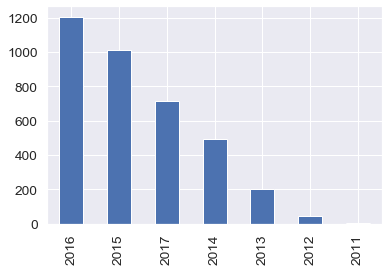

In [112]:
udemy_courses['year'].value_counts().plot(kind = 'bar')

In [113]:
udemy_courses.groupby('year')['course_title'].count()

year
2011       5
2012      45
2013     202
2014     491
2015    1013
2016    1206
2017     715
Name: course_title, dtype: int64

# Number of subscribers per year

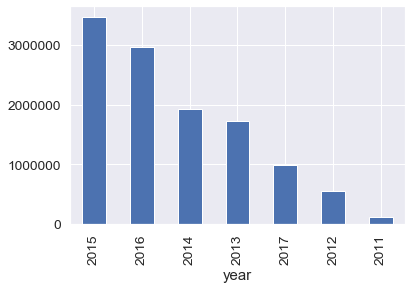

In [114]:
udemy_courses.groupby('year')['num_subscribers'].sum().sort_values(ascending = False).plot(kind = 'bar')

# Correlation

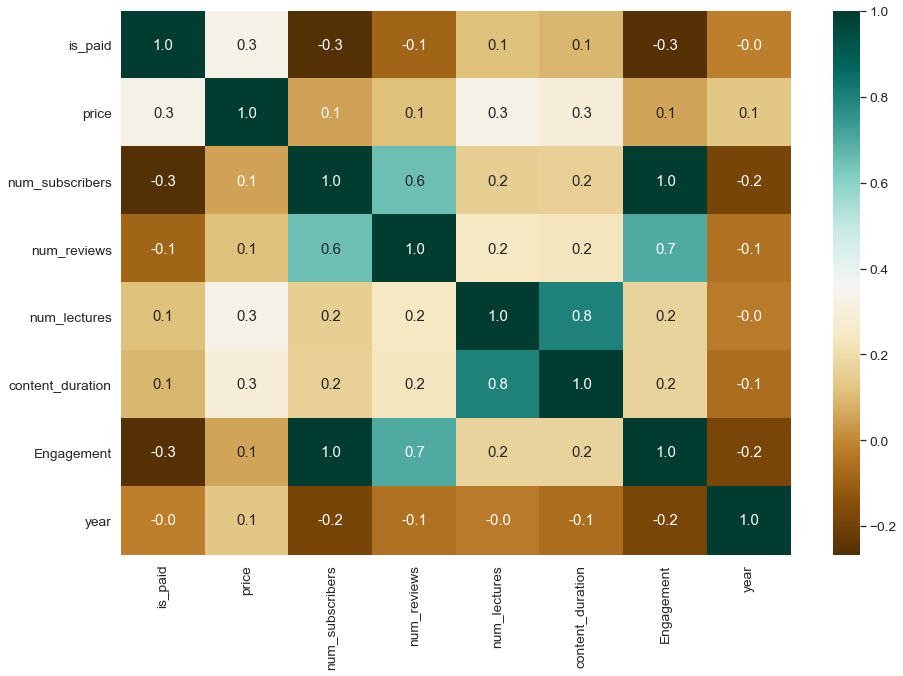

In [115]:
corr = udemy_courses.corr()
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(udemy_courses.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

We have another correlation map here because the first one did not read the published_timestamp because it was not in datetime format, thus the need for a new correlation when the date was converted

The correlation between the year a content was released and its number of subscribers is -0.2 (a negative correlation). This means the time a course was published has no impact on its number of subscribers.

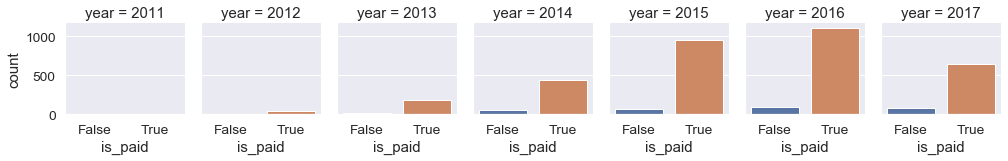

In [116]:
sns.catplot(x = 'is_paid', col = 'year',
            data = udemy_courses, 
            kind = 'count',
           height = 2.5, 
            aspect = .8
           )